In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Internship/Kaggle'

# **Load Dataset**

In [ ]:
%cd /content

/content


In [ ]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-2019-data

 96% 228M/238M [00:03<00:00, 78.8MB/s]
100% 238M/238M [00:03<00:00, 77.5MB/s]


In [ ]:
!unzip \*.zip -d dataset

Archive:  diabetic-retinopathy-224x224-2019-data.zip
  inflating: dataset/colored_images/Mild/0024cdab0c1e.png  
  inflating: dataset/colored_images/Mild/00cb6555d108.png  
  inflating: dataset/colored_images/Mild/0124dffecf29.png  
  inflating: dataset/colored_images/Mild/01b3aed3ed4c.png  
  inflating: dataset/colored_images/Mild/0369f3efe69b.png  
  inflating: dataset/colored_images/Mild/03e25101e8e8.png  
  inflating: dataset/colored_images/Mild/04ac765f91a1.png  
  inflating: dataset/colored_images/Mild/059bc89df7f4.png  
  inflating: dataset/colored_images/Mild/05a5183c92d0.png  
  inflating: dataset/colored_images/Mild/0684311afdfc.png  
  inflating: dataset/colored_images/Mild/06b71823f9cd.png  
  inflating: dataset/colored_images/Mild/07929d32b5b3.png  
  inflating: dataset/colored_images/Mild/07a1c7073982.png  
  inflating: dataset/colored_images/Mild/086d41d17da8.png  
  inflating: dataset/colored_images/Mild/09935d72892b.png  
  inflating: dataset/colored_images/Mild/0a3202

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/dataset/colored_images', output="/content/Diabetic_retinopathy", seed=1337, ratio=(0.8, 0.16,0.04))

Copying files: 3662 files [00:00, 4477.04 files/s]


In [ ]:
train_path = '/content/Diabetic_retinopathy/train'
val_path = '/content/Diabetic_retinopathy/val'
test_path = '/content/Diabetic_retinopathy/test'

In [ ]:
from glob import glob
from tensorflow.keras.applications  import VGG19

In [ ]:
model = VGG19(input_shape=(224,224,3),weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# for layer in model.layers:
#     layer.trainable = False

In [ ]:
# model.summary()

In [ ]:
folders = glob('/content/Diabetic_retinopathy/train/*')

In [ ]:
folders

['/content/Diabetic_retinopathy/train/Mild',
 '/content/Diabetic_retinopathy/train/No_DR',
 '/content/Diabetic_retinopathy/train/Moderate',
 '/content/Diabetic_retinopathy/train/Severe',
 '/content/Diabetic_retinopathy/train/Proliferate_DR']

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, MaxPooling2D

In [ ]:
# model = Sequential()
# model.add(Conv2D(256, (3,3), strides = (1,1), activation = 'relu', input_shape = (128, 128, 3)))
# model.add(MaxPooling2D(pool_size = (3,3), strides = (1,1)))
# model.add(Dropout(0.2))
# model.add(Conv2D(128, (3,3), strides = (1,1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (3,3), strides = (1,1)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (3,3), strides = (1,1)))
# model.add(Dropout(0.2))
# model.add(Conv2D(32, (3,3), strides = (1,1), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (3,3),strides = (2,2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(16,(3,3),strides= (1,1),activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Flatten())
# model.add(Dropout(0.2))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(5, activation = 'softmax'))

# model.summary()
# model_1 = model

In [ ]:
x = model.output

x = GlobalAveragePooling2D()(x)
# x = Dropout(.3)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(.2)(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(.3)(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(.3)(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(.3)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(.3)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(.3)(x)
# x = Dropout(.3)(x)
# x = Dense(128, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(.2)(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(.2)(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(.35)(x)
# x = Dropout(.2)(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(.2)(x)
predictions = Dense(len(folders), activation='softmax')(x)
model_1 = Model(inputs=model.input, outputs=predictions)    
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import Adam
model_1.compile(optimizer=Adam(learning_rate = 0.00001),loss='categorical_crossentropy', metrics=['accuracy'])

# **Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True,
                                   vertical_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = 'categorical')

Found 2929 images belonging to 5 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(val_path,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle = True,
                                          class_mode = 'categorical')

Found 583 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = True,
                                            class_mode = 'categorical')

Found 150 images belonging to 5 classes.


In [ ]:
training_set.class_indices

{'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}

In [ ]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
#                               patience=3, min_lr=0.000001)

In [ ]:
import tensorflow as tf
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [ ]:
my_callback = MyThresholdCallback(threshold=0.85)

In [ ]:
epo=50

# **Train model**

In [ ]:
r = model_1.fit(training_set,
                validation_data=val_set,
                epochs=epo,
                callbacks = [my_callback])

Epoch 1/50
92/92 [==============================] - 94s 571ms/step - loss: 1.0368 - accuracy: 0.6094 - val_loss: 0.8192 - val_accuracy: 0.7015
Epoch 2/50
92/92 [==============================] - 46s 503ms/step - loss: 0.8240 - accuracy: 0.7115 - val_loss: 0.8068 - val_accuracy: 0.7050
Epoch 3/50
92/92 [==============================] - 46s 501ms/step - loss: 0.7752 - accuracy: 0.7289 - val_loss: 0.7706 - val_accuracy: 0.7204
Epoch 4/50
92/92 [==============================] - 46s 503ms/step - loss: 0.7606 - accuracy: 0.7252 - val_loss: 0.7193 - val_accuracy: 0.7444
Epoch 5/50
92/92 [==============================] - 46s 503ms/step - loss: 0.7078 - accuracy: 0.7491 - val_loss: 0.6603 - val_accuracy: 0.7564
Epoch 6/50
92/92 [==============================] - 47s 506ms/step - loss: 0.6646 - accuracy: 0.7689 - val_loss: 0.6939 - val_accuracy: 0.7581
Epoch 7/50
92/92 [==============================] - 46s 505ms/step - loss: 0.6440 - accuracy: 0.7651 - val_loss: 0.6183 - val_accuracy: 0.7684

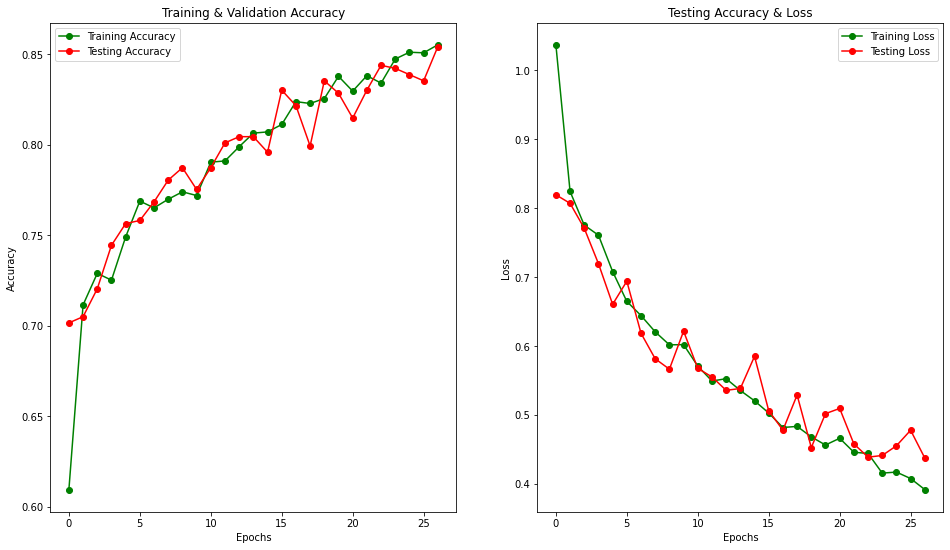

In [ ]:
import matplotlib.pyplot as plt
epochs = [i for i in range(27)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
# model_1.save("/content/drive/MyDrive/Internship/models/new_diabetic_datset/VGG19.h5")

# **Results**

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle = False,
                                                 class_mode = 'categorical')

Found 2929 images belonging to 5 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(val_path,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          shuffle = False,
                                          class_mode = 'categorical')

Found 583 images belonging to 5 classes.


In [ ]:
# from keras.models import load_model
# model_ld = load_model('/content/drive/MyDrive/Internship/new_diabetic_models/model_20_6_21.h5')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Y_pred = model_1.predict_generator(val_set, len(val_set.classes)//val_set.batch_size +1)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
val_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1,
       1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
cf = confusion_matrix(val_set.classes, y_pred)
print(cf)

[[ 36  21   0   2   0]
 [  6 146   1   6   0]
 [  7   1 280   0   0]
 [  1  17   0  25   4]
 [  1  13   0   5  11]]


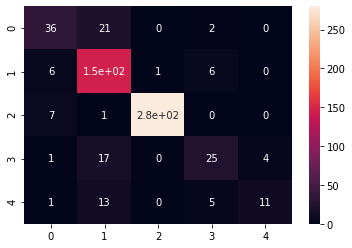

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf,annot=True)

In [ ]:
print('Classification Report')
target_names = ['Mild', 'Moderate', 'No_DR','Proliferate_DR','Severe']
print(classification_report(val_set.classes, y_pred, target_names=target_names))

Classification Report
                precision    recall  f1-score   support

          Mild       0.71      0.61      0.65        59
      Moderate       0.74      0.92      0.82       159
         No_DR       1.00      0.97      0.98       288
Proliferate_DR       0.66      0.53      0.59        47
        Severe       0.73      0.37      0.49        30

      accuracy                           0.85       583
     macro avg       0.77      0.68      0.71       583
  weighted avg       0.86      0.85      0.85       583

